In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D,MaxPool2D
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator,img_to_array

In [19]:
# imgData = load_img( 'image/cat/cat1.jpg')

Test_Lion  = '2024-2/lions-and-tigers/test/lion/'
Test_Tiger = '2024-2/lions-and-tigers/test/tiger/'

Lion_1  = load_img(Test_Lion  +'180.png')
Tiger_1 = load_img(Test_Tiger +'180.png')


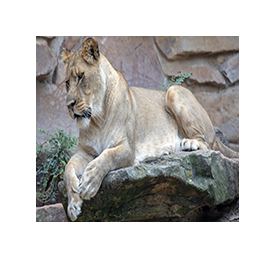

In [20]:
Lion_1

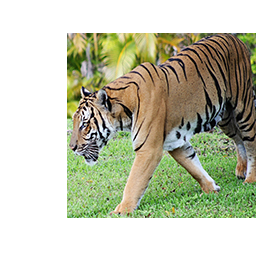

In [21]:
Tiger_1

In [24]:
def AA(e): print(e+" ==> "+str(eval(e))); # "A"nswer for str expression
AA( "type(Lion_1), type(Tiger_1)")

type(Lion_1), type(Tiger_1) ==> (<class 'PIL.Image.Image'>, <class 'PIL.Image.Image'>)


In [ ]:
# ImageDataGenerator( rescale=1./255, horizontal_flip=True, 
#                     zoom_range=0.2, width_shift_range=0.1, 
#                     height_shift_range=0.1, rotation_range=30, fill_mode='nearest')

In [25]:
dataGen  = ImageDataGenerator( rescale=1./255)
trainGen = dataGen.flow_from_directory( '2024-2/lions-and-tigers/test/' , target_size=(98,98)) # batch_size = ??

Found 40 images belonging to 2 classes.


In [26]:
x_train, y_train = next( trainGen )

In [27]:
x_train.shape

(32, 98, 98, 3)

In [28]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [29]:
trainGen.class_indices

{'lion': 0, 'tiger': 1}

In [30]:
model = Sequential()
model.add( Conv2D(32, kernel_size=(3,3), strides=1, input_shape=(98,98,3),
                  activation='relu', padding='same' ) )
model.add( Conv2D(16, kernel_size=(3,3), activation='relu') )
model.add( MaxPool2D(pool_size=(2,2) ) )
model.add( Flatten() )
model.add( Dense( units=64, activation='relu'))
model.add( Dense( units=2, activation='softmax'))
model.compile( loss='categorical_crossentropy', 
              optimizer=Adam(0.01) ,metrics=['acc'])
model.fit( trainGen ,epochs=100)
# model.fit( x_train, y_train, epochs=10)

c:\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - acc: 0.5312 - loss: 3.2475
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.5000 - loss: 97.0741  
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - acc: 0.4417 - loss: 1.0366
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.7063 - loss: 0.5516 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - acc: 0.4833 - loss: 0.9487
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.7396 - loss: 0.5355 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - acc: 0.7500 - loss: 0.4036
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - acc: 0.7833 - loss: 0.5557
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.6896 - loss: 0.5840 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - acc: 0.6500 - loss: 0.6383
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc: 0.5437 - loss: 0.6835 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.4896 - loss: 0.6941 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━

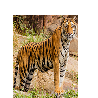

In [32]:
testImg = load_img( '2024-2/lions-and-tigers/train/tiger/0.png', target_size=(98,98))
testImg

In [33]:
imgArr = img_to_array( testImg )/255
imgArr.shape

(98, 98, 3)

In [34]:
model.predict( imgArr.reshape(1,98,98,3) ).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


array([1])